In [1]:
path_to_aug_histograms = "/home/SharedFolder/aug_histograms.csv"
path_to_naug_histograms = "/home/SharedFolder/naug_histograms.csv"
path_to_night_histograms = "/home/SharedFolder/night_histograms.csv"

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df_aug_hist = pd.read_csv(path_to_aug_histograms)
df_aug_hist = df_aug_hist.drop(columns = ["Unnamed: 0"]).reset_index(drop = True)
print(len(df_aug_hist))
df_aug_hist.head(1)

15353


,-2040,-2039,-2038,-2037,-2036,-2035,-2034,-2033,-2032,-2031,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_naug_hist = pd.read_csv(path_to_naug_histograms)
df_naug_hist = df_naug_hist.drop(columns = ["Unnamed: 0"]).reset_index(drop = True)
print(len(df_aug_hist))
df_naug_hist.head(1)

15353


,-2040,-2039,-2038,-2037,-2036,-2035,-2034,-2033,-2032,-2031,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_night_hist = pd.read_csv(path_to_night_histograms)
df_night_hist = df_night_hist.drop(columns = ["Unnamed: 0"]).reset_index(drop = True)
print(len(df_night_hist))
df_night_hist.head(1)

25388


,-2040,-2039,-2038,-2037,-2036,-2035,-2034,-2033,-2032,-2031,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
num_rows_sample = min(min(len(df_aug_hist), len(df_naug_hist)), len(df_night_hist))
df_aug_hist = df_aug_hist.sample(n = num_rows_sample, replace = False, random_state = 123, axis = 0).reset_index(drop = True)
df_naug_hist = df_naug_hist.sample(n = num_rows_sample, replace = False, random_state = 123, axis = 0).reset_index(drop = True)
df_night_hist = df_night_hist.sample(n = num_rows_sample, replace = False, random_state = 123, axis = 0).reset_index(drop = True)

In [7]:
df_aug_hist = df_aug_hist.median(axis = 0)
df_naug_hist = df_naug_hist.median(axis = 0)
df_night_hist = df_night_hist.median(axis = 0)

In [8]:
import numpy as np

df_aug_hist = df_aug_hist.apply(lambda x: np.where(x <= 1, 0, x))
df_naug_hist = df_naug_hist.apply(lambda x: np.where(x <= 1, 0, x))
df_night_hist = df_night_hist.apply(lambda x: np.where(x <= 1, 0, x))

In [9]:
df_hist = pd.concat([df_aug_hist, df_naug_hist, df_night_hist], axis = 1)
df_hist.columns = ["GAN-output-Night", "GAN-input-Day", "Real-Night"]
df_hist.head()

,GAN-output-Night,GAN-input-Day,Real-Night
-2040,0.0,0.0,0.0
-2039,0.0,0.0,0.0
-2038,0.0,0.0,0.0
-2037,0.0,0.0,0.0
-2036,0.0,0.0,0.0


In [10]:
df_hist_cleaned = df_hist.loc[df_hist.loc[:, "GAN-output-Night"] > 0]
df_hist_cleaned = df_hist_cleaned.loc[df_hist_cleaned.loc[:, "GAN-input-Day"] > 0]
df_hist_cleaned = df_hist_cleaned.loc[df_hist_cleaned.loc[:, "Real-Night"] > 0]
df_hist_cleaned.head()

,GAN-output-Night,GAN-input-Day,Real-Night
-592,2.0,3.0,2.0
-588,2.0,3.0,2.0
-586,2.0,3.0,2.0
-584,2.0,3.0,2.0
-582,2.0,3.0,2.0


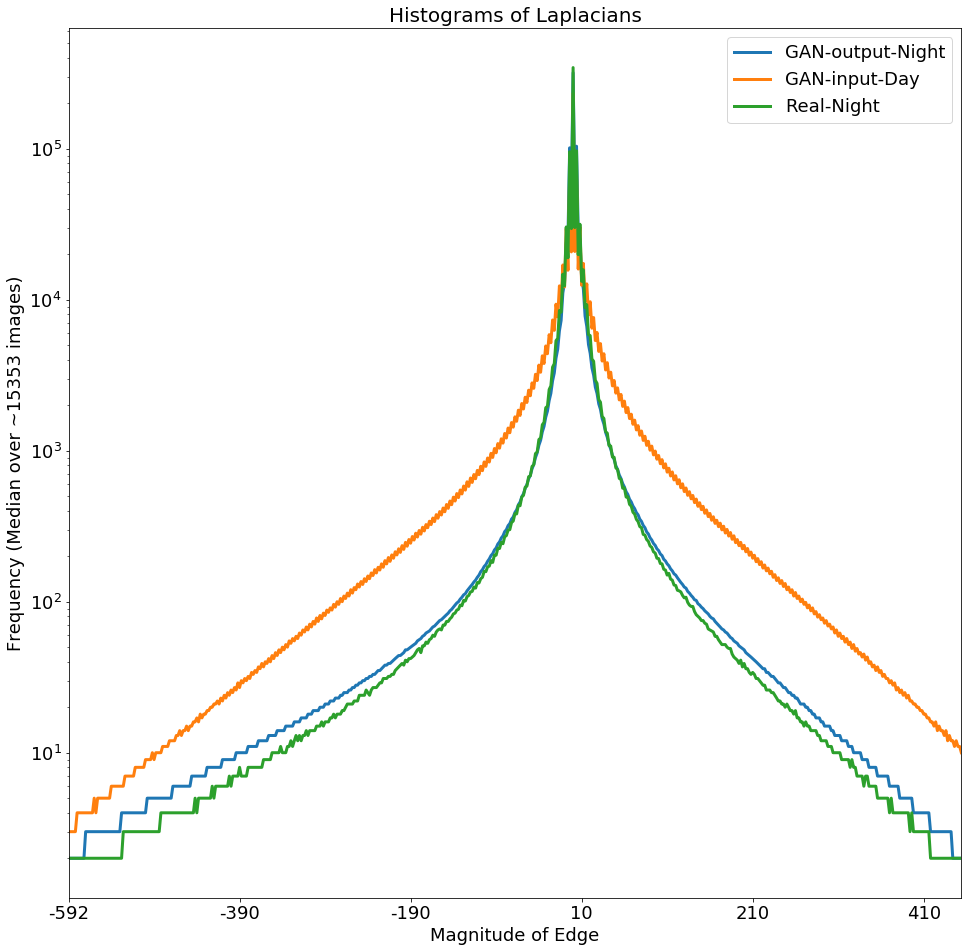

In [28]:
ax = df_hist_cleaned.plot(logx = False, logy = True, figsize = (16, 16), title = "Histograms of Laplacians", lw = 3)
ax.set_xlabel("Magnitude of Edge", fontsize = 18)
ax.set_ylabel("Frequency (Median over ~15353 images)", fontsize = 18)
ax.title.set_size(20)
ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)
ax.legend( prop = dict(size = 18))